In [1]:
import torch
torch.__version__

'2.3.1+cu121'

In [2]:
# !nvidia-smi

Sat Aug 10 09:51:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
# !pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 51.3 MB/s eta 0:00:00


In [6]:
from diffusers import I2VGenXLPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
import diffusers
diffusers.__version__

'0.30.0'

In [8]:
repo_id = 'ali-vilab/i2vgen-xl'

In [9]:
pipeline = I2VGenXLPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, variant='fp16')

model_index.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/706M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
pipeline.enable_model_cpu_offload()

In [11]:
from diffusers.utils import load_image, export_to_video

In [12]:
image = load_image('blonde_girl.jfif')

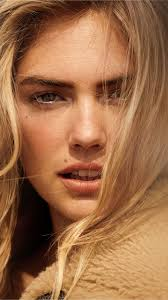

In [13]:
image

In [14]:
image.size

(168, 300)

In [15]:
prompt = "Blonde girl smiles beautifully"

In [17]:
generator = torch.manual_seed(8888)

In [18]:
frames = pipeline(prompt=prompt, image=image, generator=generator).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
export_to_video(frames, 'I2V_Output.mp4', fps=8)

'I2V_Output.mp4'

In [20]:
type(frames)

list

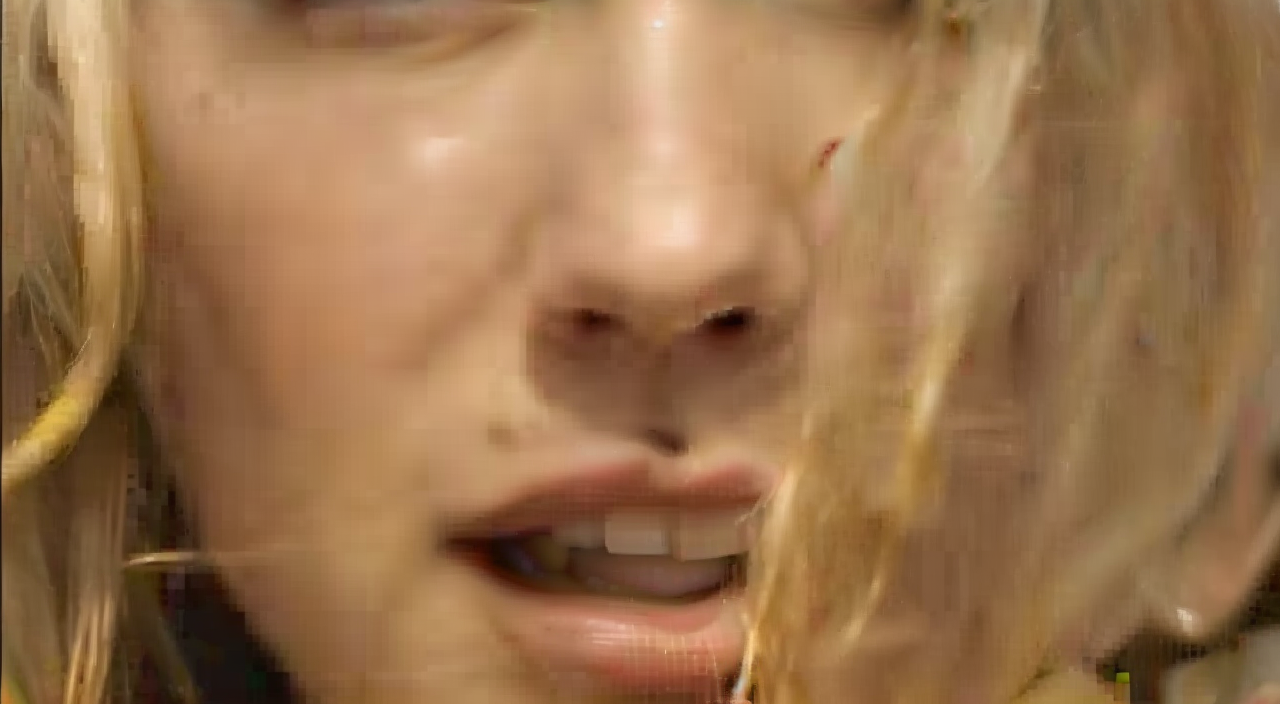

In [21]:
frames[1]